In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import warnings
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [170]:
df =pd.read_excel('data\gazete.xlsx')
df

,kategori,icerik
0,magazin,SAPIĞIN BİLE GURURSUZU BANA DENK GELDİ Ece Erk...
1,magazin,"Çekim dönüşü Kenan İmirzalıoğlu, geçtiğimiz ak..."
2,magazin,Paylaştığı fotoğraf Twitter'da olay oldu! Vict...
3,magazin,"DANIŞTAY, 5 DAKİKA SEVİŞMEYİ UZUN BULDU Danışt..."
4,magazin,Yağmur ve Emre dudak dudağa Kanal D'nin yeni y...
...,...,...
5709,teknoloji,Çift hörgüçlü Asya devesinin gen haritası çıka...
5710,teknoloji,Google'a devlet baskısı artıyor Google'ın yayı...
5711,teknoloji,Google Chrome OS yada ZeroPC ? Klasik PC ve no...
5712,teknoloji,"Balon avı oyna, anahtar topla... Tipeez.com, b..."


In [166]:
df["icerik"] = df["icerik"].str.lower()
df

,kategori,icerik,kategori_id
5709,teknoloji,çift hörgüçlü asya devesinin gen haritası çıka...,5
5710,teknoloji,google'a devlet baskısı artıyor google'ın yayı...,5
5711,teknoloji,google chrome os yada zeropc klasik pc noteboo...,5
5712,teknoloji,balon avı oyna anahtar topla tipeezcom birbiri...,5
5713,teknoloji,dropbox kendini dörde katladı popüler bulut se...,5


In [165]:
import nltk
stop_word_list = nltk.corpus.stopwords.words('turkish')

docs = df['icerik']
docs = docs.map(lambda x: re.sub(r"[-()\"#/@;:<>{}+=~|.!?,]", '', x))
docs = docs.map(lambda x: x.lower())
docs = docs.map(lambda x: x.strip())

def token(values):
    filtered_words = [word for word in values.split() if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc


docs = docs.map(lambda x: token(x))
df['icerik'] = docs
print(df.tail(20))

       kategori                                             icerik  \
5694  teknoloji  otomobil yazıcıdan çıktı james bond serisinin ...   
5695  teknoloji  maya takvimine göre güneş son tutuldu maya tak...   
5696  teknoloji  apple türkiye'de mağaza açıyor bilgisayar devr...   
5697  teknoloji  i̇nternet kullanıcılarına önemli uyarı tüketi̇...   
5698  teknoloji  balon avı oyna anahtar topla tipeezcom birbiri...   
5699  teknoloji  binlerce kişi izledi avustralya'da 10 yıl arad...   
5700  teknoloji  i̇slam ülkelerinin xxx karnesi dünyanın ziyare...   
5701  teknoloji  abd'de bir ilk abd tarihinde bir ilk yaşandı g...   
5702  teknoloji  i̇nternette şeyinizi paylaşmayın tüketiciyi ko...   
5703  teknoloji  skype solucanı hızla yayılıyor 2001 yılında mi...   
5704  teknoloji  cep telefonlarında şarjım bitti dönemi kapan...   
5705  teknoloji  nokia kendi street view'ini yaratıyor windows ...   
5706  teknoloji  sony eurasia'ya yeni kaptan sony eurasianin y...   
5707  teknoloji  dro

In [144]:
df["kategori_id"] = df["kategori"].factorize()[0]
df['kategori_id'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: kategori_id, dtype: int64

In [145]:
kategori_id_df = df[['kategori', 'kategori_id']].drop_duplicates().sort_values('kategori_id')
kategori_id_df

,kategori,kategori_id
0,magazin,0
1099,dunya,1
2132,spor,2
3021,siyaset,3
4039,kultur-sanat,4
4943,teknoloji,5


In [146]:
kategori_to_id = dict(kategori_id_df.values)
id_to_kategori = dict(kategori_id_df[['kategori_id', 'kategori']].values)
id_to_kategori

{0: 'magazin',
 1: 'dunya',
 2: 'spor',
 3: 'siyaset',
 4: 'kultur-sanat',
 5: 'teknoloji'}

In [147]:
df.sample(5, random_state=0)

,kategori,icerik,kategori_id
1687,dunya,merkel diğer dinlere hoşgörülü olmalıyız alman...,1
5641,teknoloji,facebook'ta beğeniler kimliğinizi ele veriyor ...,5
1755,dunya,almanya'da gıda fabrikasında kaza aşağı sakson...,1
3255,siyaset,putin esadın gidişine dolmabahçede ikna oldu...,3
3675,siyaset,hakim albayın heron isyanı pkkya zayiat ver...,3


In [148]:
df.groupby('kategori').kategori_id.count()

kategori
dunya           1033
kultur-sanat     904
magazin         1099
siyaset         1018
spor             889
teknoloji        771
Name: kategori_id, dtype: int64

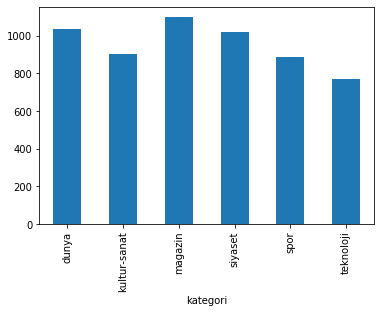

In [149]:
df.groupby('kategori').kategori_id.count().plot.bar(ylim=0)

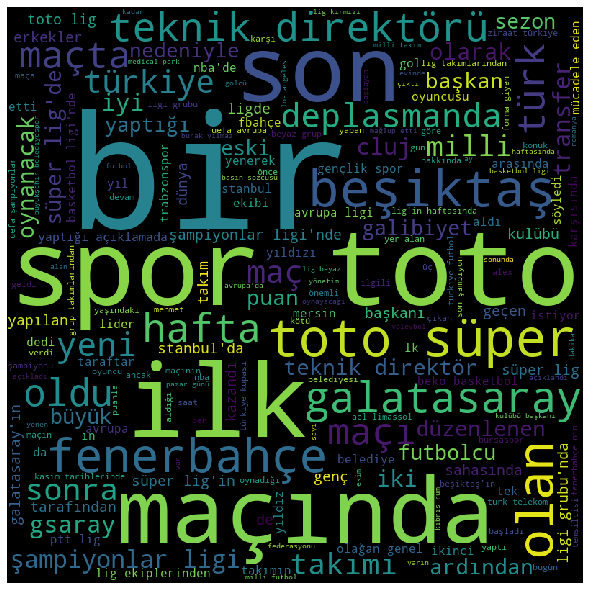

In [150]:
from wordcloud import WordCloud


def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width=800, height=800,
                                   background_color='black',
                                   stopwords=None,
                                   min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud_instance)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()



def plot_word_cloud_for_category(df, kategori):
    text_df = df.loc[df['kategori'] == str(kategori)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + item['icerik']
    plot_word_cloud(texts)


plot_word_cloud_for_category(df, 'spor')

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [152]:
features = tfidf.fit_transform(df.icerik).toarray()

In [153]:
labels = df.kategori_id  

In [154]:
#tf-idf ten gelen özelliklerin sayoısı
features.shape


(5714, 7776)

In [155]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
#kategori id leri
kategori_to_id.items()

dict_items([('magazin', 0), ('dunya', 1), ('spor', 2), ('siyaset', 3), ('kultur-sanat', 4), ('teknoloji', 5)])

In [157]:
sorted(kategori_to_id.items())

[('dunya', 1),
 ('kultur-sanat', 4),
 ('magazin', 0),
 ('siyaset', 3),
 ('spor', 2),
 ('teknoloji', 5)]

In [158]:
#özelliklerin önemi (kelimelerin önemi) ve etiketler arasındaki ilişkiyi bulmak için ki-kara kullnımı
from sklearn.feature_selection import chi2

N = 3 

for kategori, kategori_id in sorted(kategori_to_id.items()):
    features_chi2 = chi2(features, labels == kategori_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1] 
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(kategori))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) 

# 'dunya':
  . Most correlated unigrams:
       . rusya
       . suriye
       . srail
  . Most correlated bigrams:
       . dışişleri bakanı
       . srail in
       . devlet başkanı
# 'kultur-sanat':
  . Most correlated unigrams:
       . kültür
       . sanat
       . film
  . Most correlated bigrams:
       . sahiplerini buldu
       . kültür sanat
       . film festivali
# 'magazin':
  . Most correlated unigrams:
       . kanal
       . oyuncu
       . önceki
  . Most correlated bigrams:
       . önceki akşam
       . kanal nin
       . önceki gün
# 'siyaset':
  . Most correlated unigrams:
       . erdoğan
       . başbakan
       . chp
  . Most correlated bigrams:
       . genel başkanı
       . tayyip erdoğan
       . ak parti
# 'spor':
  . Most correlated unigrams:
       . spor
       . ligi
       . lig
  . Most correlated bigrams:
       . ligi nde
       . süper lig
       . spor toto
# 'teknoloji':
  . Most correlated unigrams:
       . akıllı
       . apple
       . googl

In [159]:
features_chi2

(array([1.33793358, 0.95201208, 0.18054835, ..., 0.23662278, 0.43751635,
        0.19872811]),
 array([0.24739871, 0.32920767, 0.67090242, ..., 0.62665603, 0.50832365,
        0.65574945]))

In [160]:
#t-Distributed Stochatic Neigbor Embedding
from sklearn.manifold import TSNE

SAMPLE_SIZE = int(len(features) * 0.3)

np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

In [161]:
type(projected_features)

numpy.ndarray

In [162]:
#kategori idye göre kaysayılar
id_ = 0
projected_features[(labels[indices] == id_).values]

array([[ 3.56194763e+01, -1.92273998e+01],
       [ 3.79332123e+01, -1.06431475e+01],
       [ 3.47835846e+01,  2.67631263e-01],
       [ 8.18287659e+00,  3.35071144e+01],
       [ 1.24853821e+01, -4.80147171e+01],
       [ 3.11936054e+01,  1.21714048e+01],
       [ 8.53562164e+00, -1.84430161e+01],
       [ 1.98117657e+01, -7.39099598e+00],
       [ 1.50354519e+01,  4.61646423e+01],
       [ 1.48423405e+01,  5.66376925e+00],
       [ 1.93024178e+01, -4.35358810e+01],
       [ 3.04842854e+01,  1.28485594e+01],
       [ 3.72918091e+01, -4.65482254e+01],
       [ 3.72896361e+00,  2.76905994e+01],
       [-2.34730759e+01, -2.26822777e+01],
       [ 3.30603447e+01, -4.36580696e+01],
       [-5.98203611e+00, -2.31384449e+01],
       [ 1.81151657e+01,  4.90165825e+01],
       [ 1.10437403e+01,  1.07407618e+01],
       [ 3.16937160e+01, -3.42509308e+01],
       [ 1.68772202e+01, -2.02210579e+01],
       [-9.10544968e+00,  1.09733419e+01],
       [ 2.96792870e+01, -1.94583492e+01],
       [ 4.

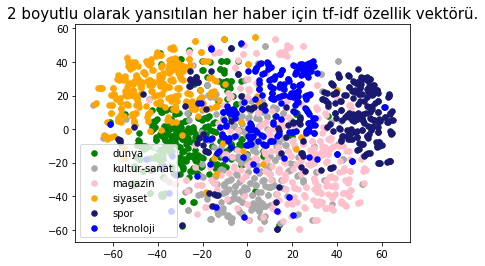

In [168]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey', "blue"]
for kategori, kategori_id in sorted(kategori_to_id.items()):
    points = projected_features[(labels[indices] == kategori_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[kategori_id], label=kategori)
plt.title("2 boyutlu olarak yansıtılan her haber için tf-idf özellik vektörü.",
          fontdict=dict(fontsize=15))
plt.legend()

In [108]:
features.shape

(5714, 7776)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [110]:
CV = 5  # 5 farklı % 20 veri ile Çapraz Doğrulama (5 kat ile 80-20 bölme)
# 3 farklı model 5 denemeyle sonçlar gelecek bunun için bir dizi olultur.
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] 

In [111]:
for model in models:
    model_name = model.__class__.__name__
  # 5 farklı %20 ile oluşturulan model soncları
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # 5 sonuçta saklanır. 3 model için
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

In [112]:
# modller ve sonçlar kayedilir. 
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

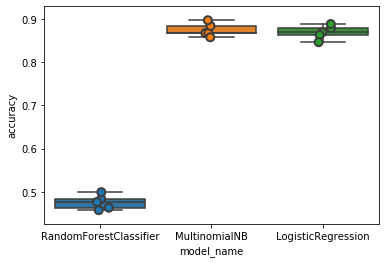

In [113]:
#sonuçları boxplot ile gösterme
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [114]:
#acu ortalaması
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.868747
MultinomialNB             0.874348
RandomForestClassifier    0.476371
Name: accuracy, dtype: float64

In [115]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.483815
1,RandomForestClassifier,1,0.476815
2,RandomForestClassifier,2,0.499563
3,RandomForestClassifier,3,0.463692
4,RandomForestClassifier,4,0.457968
5,MultinomialNB,0,0.867017
6,MultinomialNB,1,0.867017
7,MultinomialNB,2,0.857393
8,MultinomialNB,3,0.883640
9,MultinomialNB,4,0.896673


In [116]:
# %33 test verisiyle log reg deneyelim

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

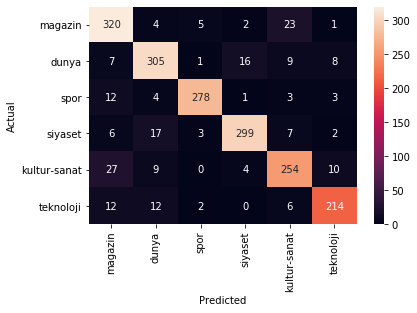

In [119]:
#seabornla confusion mateix yazdırma
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=kategori_id_df.kategori.values, yticklabels=kategori_id_df.kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [120]:
#modeli eğitelim
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
# her kategori için özelliklerin önemini veriri.
model.coef_


array([[-0.49678539,  0.33990124, -0.1395452 , ...,  0.07597607,
        -0.05438323, -0.13324776],
       [-0.52820804, -0.11793873, -0.07313539, ...,  0.00143027,
         0.20386811, -0.0939431 ],
       [ 0.11977242, -0.09411399,  0.16742126, ...,  0.11713721,
        -0.20704911, -0.11094786],
       [ 0.17374245, -0.10605478,  0.22907886, ..., -0.08156825,
         0.51009565,  0.303966  ],
       [ 0.07916085, -0.20054333, -0.08951946, ..., -0.05733938,
        -0.25802402,  0.11859967],
       [ 0.65231771,  0.17874959, -0.09430008, ..., -0.05563592,
        -0.1945074 , -0.08442695]])

In [123]:
from sklearn.feature_selection import chi2

N = 5
for kategori, kategori_id in sorted(kategori_to_id.items()):
    indices = np.argsort(model.coef_[kategori_id])   # This time using the model co-eficients / weights
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(kategori))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'dunya':
  . Top unigrams:
       . srail
       . suriye
       . abd
       . da
       . ran
  . Top bigrams:
       . devlet başkanı
       . almanya da
       . çin de
       . dışişleri bakanı
       . mısır da
# 'kultur-sanat':
  . Top unigrams:
       . sanat
       . film
       . kültür
       . yazar
       . kitap
  . Top bigrams:
       . dünyaca ünlü
       . tekin akmansoy
       . sahiplerini buldu
       . yayınları ndan
       . film festivali
# 'magazin':
  . Top unigrams:
       . oyuncu
       . ünlü
       . önceki
       . şarkıcı
       . kanal
  . Top bigrams:
       . önceki akşam
       . önceki gün
       . kanal nin
       . muhteşem yüzyıl
       . ünlü şarkıcı
# 'siyaset':
  . Top unigrams:
       . chp
       . başbakan
       . erdoğan
       . bakanı
       . mhp
  . Top bigrams:
       . ak parti
       . genel başkanı
       . başbakan erdoğan
       . başbakan yardımcısı
       . chp genel
# 'spor':
  . Top unigrams:
       . spor
       . federas

In [132]:
texts = ["Porto, Finansal Fair Play nedeniyle sıkıntılı bir süreç yaşarken dengeyi sağlamak adına yaz aylarında oyuncu satışları gerçekleştirmeyi planlıyor. ",
         "O Jogo gazetesine göre 21 yaşındaki savunmacı için en ciddi aday olarak Valencia gösterilirken Sapo Desporto, Beşiktaş'ın da devredeki takımlardan biri olduğunu belirtti. ",
         "Siyah-Beyazlılar, devre arasında da oyuncuyu kadrosuna katmak istemiş fakat yapılan kiralama teklifi kulübü tarafından reddedilmişti.",
         "Porto'nun kiralamaktan çok oyuncuyu satarak gelir elde etmek istiyor oluşu, Beşiktaş'ın işini güçleştiren nedenlerin başında geliyor. Çünkü Portekiz ekibi oyuncudan yüksek bir bonservis geliri elde etmek isterken Valencia, Southampton, Feyenoord, Sevilla, Ajax, Bordoeaux ve Borussia Mönchengladbach'ın oyuncuyla ilgilendikleri belirtiliyor. ",
         "Portekiz ekibinde takımdan ayrılması beklenen ilk isim ise genç defans Diogo Leite."]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print("Metin: ", text)
    print("  - Tahmin:",id_to_kategori[predicted])
    print("")

Metin:  Porto, Finansal Fair Play nedeniyle sıkıntılı bir süreç yaşarken dengeyi sağlamak adına yaz aylarında oyuncu satışları gerçekleştirmeyi planlıyor. 
  - Tahmin: magazin

Metin:  O Jogo gazetesine göre 21 yaşındaki savunmacı için en ciddi aday olarak Valencia gösterilirken Sapo Desporto, Beşiktaş'ın da devredeki takımlardan biri olduğunu belirtti. 
  - Tahmin: dunya

Metin:  Siyah-Beyazlılar, devre arasında da oyuncuyu kadrosuna katmak istemiş fakat yapılan kiralama teklifi kulübü tarafından reddedilmişti.
  - Tahmin: spor

Metin:  Porto'nun kiralamaktan çok oyuncuyu satarak gelir elde etmek istiyor oluşu, Beşiktaş'ın işini güçleştiren nedenlerin başında geliyor. Çünkü Portekiz ekibi oyuncudan yüksek bir bonservis geliri elde etmek isterken Valencia, Southampton, Feyenoord, Sevilla, Ajax, Bordoeaux ve Borussia Mönchengladbach'ın oyuncuyla ilgilendikleri belirtiliyor. 
  - Tahmin: spor

Metin:  Portekiz ekibinde takımdan ayrılması beklenen ilk isim ise genç defans Diogo Leite.
  -

In [131]:
text = ["Porto, Finansal Fair Play nedeniyle sıkıntılı bir süreç yaşarken dengeyi sağlamak adına yaz aylarında oyuncu satışları gerçekleştirmeyi planlıyor. Portekiz ekibinde takımdan ayrılması beklenen ilk isim ise genç defans Diogo Leite... O Jogo gazetesine göre 21 yaşındaki savunmacı için en ciddi aday olarak Valencia gösterilirken Sapo Desporto, Beşiktaş'ın da devredeki takımlardan biri olduğunu belirtti. Siyah-Beyazlılar, devre arasında da oyuncuyu kadrosuna katmak istemiş fakat yapılan kiralama teklifi kulübü tarafından reddedilmişti.Porto'nun kiralamaktan çok oyuncuyu satarak gelir elde etmek istiyor oluşu, Beşiktaş'ın işini güçleştiren nedenlerin başında geliyor. Çünkü Portekiz ekibi oyuncudan yüksek bir bonservis geliri elde etmek isterken Valencia, Southampton, Feyenoord, Sevilla, Ajax, Bordoeaux ve Borussia Mönchengladbachın oyuncuyla ilgilendikleri belirtiliyor. "]
text_features = tfidf.transform(t)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print("Metin: ", text)
    print("  - Tahmin:",id_to_kategori[predicted])
    print("")

Metin:  Porto, Finansal Fair Play nedeniyle sıkıntılı bir süreç yaşarken dengeyi sağlamak adına yaz aylarında oyuncu satışları gerçekleştirmeyi planlıyor. 
  - Tahmin: spor

